In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import matthews_corrcoef, plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/gpt.csv')
print(df.shape)
df.head()

(6447, 160)


,mean_mfcc_1,mean_mfcc_2,mean_mfcc_3,mean_mfcc_4,mean_mfcc_5,mean_mfcc_6,mean_mfcc_7,mean_mfcc_8,mean_mfcc_9,mean_mfcc_10,...,kurtosis_delta2_mfcc_8,kurtosis_delta2_mfcc_9,kurtosis_delta2_mfcc_10,kurtosis_delta2_mfcc_11,kurtosis_delta2_mfcc_12,kurtosis_delta2_mfcc_13,technique,subtechnique,tone_type,file_path
0,-411.65314,33.170135,-30.911780,38.635730,-24.372381,-14.701840,-13.416180,-18.674322,-4.827284,-7.523250,...,3.033881,7.131977,2.107958,1.055066,6.452170,4.515785,normal,normal_whole_step_up,5,../data/guitar/wav/5/normal_whole_step_up/norm...
1,-399.08527,30.436052,-33.198303,44.226353,-19.701908,-14.285540,-7.467613,-15.525382,-9.905143,-7.433832,...,1.327275,1.314436,5.728040,3.939144,1.454260,4.650425,normal,normal_whole_step_up,5,../data/guitar/wav/5/normal_whole_step_up/norm...
2,-411.24110,27.454344,-31.142880,41.796850,-21.297293,-16.594273,-14.108022,-22.829268,-8.346383,-8.005956,...,0.774317,2.350504,2.191023,0.286006,1.011268,4.786306,normal,normal_whole_step_up,5,../data/guitar/wav/5/normal_whole_step_up/norm...
3,-412.59488,32.472946,-33.717010,32.722760,-27.585297,-20.834576,-3.360715,-0.139201,18.071037,20.306720,...,1.814800,0.370574,0.382478,8.740768,2.768397,8.513342,normal,normal_whole_step_up,5,../data/guitar/wav/5/normal_whole_step_up/norm...
4,-463.63068,23.407460,-37.412075,23.105309,-25.589716,-13.467739,17.442879,17.299585,30.478392,20.385946,...,-0.077335,2.848352,2.663400,3.453472,5.990107,5.814278,normal,normal_whole_step_up,5,../data/guitar/wav/5/normal_whole_step_up/norm...


In [4]:
df = pd.read_csv('../data/gpt2.csv')
print(df.shape)
df.head

(6447, 160)


,mean_mfcc_1,mean_mfcc_2,mean_mfcc_3,mean_mfcc_4,mean_mfcc_5,mean_mfcc_6,mean_mfcc_7,mean_mfcc_8,mean_mfcc_9,mean_mfcc_10,...,kurtosis_delta2_mfcc_8,kurtosis_delta2_mfcc_9,kurtosis_delta2_mfcc_10,kurtosis_delta2_mfcc_11,kurtosis_delta2_mfcc_12,kurtosis_delta2_mfcc_13,technique,subtechnique,tone_type,file_path
0,-411.65314,33.170135,-30.911780,38.635730,-24.372381,-14.701840,-13.416180,-18.674322,-4.827284,-7.523250,...,4.320754,6.900723,1.550282,1.283120,6.022099,4.430148,normal,normal_whole_step_up,5,../data/guitar/wav/5/normal_whole_step_up/norm...
1,-399.08527,30.436052,-33.198303,44.226353,-19.701908,-14.285540,-7.467613,-15.525382,-9.905143,-7.433832,...,2.232981,1.091241,6.138021,4.186696,2.572085,4.529522,normal,normal_whole_step_up,5,../data/guitar/wav/5/normal_whole_step_up/norm...
2,-411.24110,27.454344,-31.142880,41.796850,-21.297293,-16.594273,-14.108022,-22.829268,-8.346383,-8.005956,...,0.574031,2.997862,2.170656,1.166915,1.340580,4.846247,normal,normal_whole_step_up,5,../data/guitar/wav/5/normal_whole_step_up/norm...
3,-412.59488,32.472946,-33.717010,32.722760,-27.585297,-20.834576,-3.360715,-0.139201,18.071037,20.306720,...,1.622491,0.911100,0.562873,8.964993,2.880903,8.729866,normal,normal_whole_step_up,5,../data/guitar/wav/5/normal_whole_step_up/norm...
4,-463.63068,23.407460,-37.412075,23.105309,-25.589716,-13.467739,17.442879,17.299585,30.478392,20.385946,...,0.167333,2.717007,2.518794,3.251980,6.117061,5.795457,normal,normal_whole_step_up,5,../data/guitar/wav/5/normal_whole_step_up/norm...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6442,-259.43195,113.581250,-60.711704,38.687447,-16.485188,-16.529064,-18.669495,-9.401738,-13.028473,-6.518498,...,-0.234040,1.078889,1.013798,0.447506,-0.303494,0.196200,slide,slide_whole_step_down,4,../data/guitar/wav/4/slide_whole_step_down/sli...
6443,-267.36304,100.107544,-65.090050,40.042583,-25.081902,-13.342467,-21.605759,0.493293,4.827024,13.048793,...,-0.491916,-0.499367,-0.266575,-0.434209,-0.120999,1.198053,slide,slide_whole_step_down,4,../data/guitar/wav/4/slide_whole_step_down/sli...
6444,-240.61841,106.457780,-73.125080,45.112090,-24.206589,-5.423219,-21.370804,1.308757,-5.778953,-4.319183,...,0.549861,-0.318323,-0.145430,1.476785,-0.047101,0.963316,slide,slide_whole_step_down,4,../data/guitar/wav/4/slide_whole_step_down/sli...
6445,-253.73338,108.137375,-64.209660,45.611935,-20.468567,-8.575330,-23.142643,-8.460610,-13.505126,-7.615469,...,1.782875,1.372508,1.179815,-0.227901,-0.183635,-0.341773,slide,slide_whole_step_down,4,../data/guitar/wav/4/slide_whole_step_down/sli...


In [12]:
dropped = [x for x in list(df.columns) if x[-2:] == '_1']

data = df.drop(columns=dropped)
data

,mean_mfcc_2,mean_mfcc_3,mean_mfcc_4,mean_mfcc_5,mean_mfcc_6,mean_mfcc_7,mean_mfcc_8,mean_mfcc_9,mean_mfcc_10,mean_mfcc_11,...,kurtosis_delta2_mfcc_8,kurtosis_delta2_mfcc_9,kurtosis_delta2_mfcc_10,kurtosis_delta2_mfcc_11,kurtosis_delta2_mfcc_12,kurtosis_delta2_mfcc_13,technique,subtechnique,tone_type,file_path
0,33.170135,-30.911780,38.635730,-24.372381,-14.701840,-13.416180,-18.674322,-4.827284,-7.523250,3.586741,...,4.320754,6.900723,1.550282,1.283120,6.022099,4.430148,normal,normal_whole_step_up,5,../data/guitar/wav/5/normal_whole_step_up/norm...
1,30.436052,-33.198303,44.226353,-19.701908,-14.285540,-7.467613,-15.525382,-9.905143,-7.433832,-7.796216,...,2.232981,1.091241,6.138021,4.186696,2.572085,4.529522,normal,normal_whole_step_up,5,../data/guitar/wav/5/normal_whole_step_up/norm...
2,27.454344,-31.142880,41.796850,-21.297293,-16.594273,-14.108022,-22.829268,-8.346383,-8.005956,-10.035259,...,0.574031,2.997862,2.170656,1.166915,1.340580,4.846247,normal,normal_whole_step_up,5,../data/guitar/wav/5/normal_whole_step_up/norm...
3,32.472946,-33.717010,32.722760,-27.585297,-20.834576,-3.360715,-0.139201,18.071037,20.306720,20.008034,...,1.622491,0.911100,0.562873,8.964993,2.880903,8.729866,normal,normal_whole_step_up,5,../data/guitar/wav/5/normal_whole_step_up/norm...
4,23.407460,-37.412075,23.105309,-25.589716,-13.467739,17.442879,17.299585,30.478392,20.385946,-18.861895,...,0.167333,2.717007,2.518794,3.251980,6.117061,5.795457,normal,normal_whole_step_up,5,../data/guitar/wav/5/normal_whole_step_up/norm...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6442,113.581250,-60.711704,38.687447,-16.485188,-16.529064,-18.669495,-9.401738,-13.028473,-6.518498,-0.096909,...,-0.234040,1.078889,1.013798,0.447506,-0.303494,0.196200,slide,slide_whole_step_down,4,../data/guitar/wav/4/slide_whole_step_down/sli...
6443,100.107544,-65.090050,40.042583,-25.081902,-13.342467,-21.605759,0.493293,4.827024,13.048793,21.302406,...,-0.491916,-0.499367,-0.266575,-0.434209,-0.120999,1.198053,slide,slide_whole_step_down,4,../data/guitar/wav/4/slide_whole_step_down/sli...
6444,106.457780,-73.125080,45.112090,-24.206589,-5.423219,-21.370804,1.308757,-5.778953,-4.319183,-5.156901,...,0.549861,-0.318323,-0.145430,1.476785,-0.047101,0.963316,slide,slide_whole_step_down,4,../data/guitar/wav/4/slide_whole_step_down/sli...
6445,108.137375,-64.209660,45.611935,-20.468567,-8.575330,-23.142643,-8.460610,-13.505126,-7.615469,0.454342,...,1.782875,1.372508,1.179815,-0.227901,-0.183635,-0.341773,slide,slide_whole_step_down,4,../data/guitar/wav/4/slide_whole_step_down/sli...


In [13]:
data.to_csv('../data/gpt3.csv', index=False)

In [4]:
technique = pd.value_counts(df['technique']).reset_index()
technique.columns = ['Teknik Bermain Gitar', 'Jumlah']
px.bar(technique, x='Teknik Bermain Gitar', y='Jumlah', width=400, height=300)

In [5]:
X = df.iloc[:,:156]
y = df['technique']
y_sub = df['subtechnique']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42, stratify=y_sub)

scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

MCC:  0.8530200916176779
              precision    recall  f1-score   support

     bending       0.94      0.93      0.94       127
     hamming       0.70      0.62      0.66        56
        mute       1.00      1.00      1.00        38
      normal       0.93      0.92      0.93       196
     pulling       0.86      0.75      0.80        51
       slide       0.77      0.89      0.83       114
       trill       0.90      0.89      0.90        63

    accuracy                           0.88       645
   macro avg       0.87      0.86      0.86       645
weighted avg       0.88      0.88      0.88       645



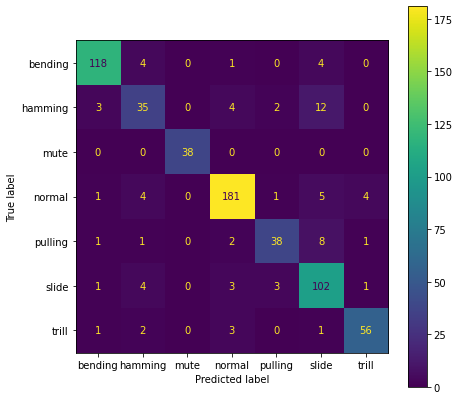

In [7]:
c = 2.5
sigma = 1.25
clf = SVC(kernel='rbf', C=2**c, gamma=1/(2*(2**sigma)**2), decision_function_shape='ovo')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('MCC: ', matthews_corrcoef(y_test, y_pred))
print(classification_report(y_test, y_pred))
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(clf, X_test, y_test, ax=ax)
plt.show()

In [15]:
gamma = 1 / (156 * X_train.var())
gamma

0.042210011625998814

In [16]:
sigma = np.sqrt(1/(2*gamma))
sigma

3.4417337158693284

In [18]:
np.sqrt((156*X_train.var())/2)

3.4417337158693284

In [20]:
gamma = 1 / (156 * np.var(X_train))
gamma

0.042210011625998814